
# Практическая работа 4-2: Линейная регрессия 2

Name: Вереина Мария

Email: vereina.m@yandex.ru


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [85]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [86]:
from google.colab import files

uploaded = files.upload()

Saving Credit.csv to Credit (4).csv


In [87]:
 # Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Посмотрим информацию по типам данных столбцов исходного набора данных

In [88]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


Посмотрим описание по численным столбцам. Медиана и среднее близки по значениям, это говорит о неплохом состоянии данных.

In [89]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Необходимо посмотреть на влияние переменных друг на друга в разрезе корреляционной матрицы

             Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000  


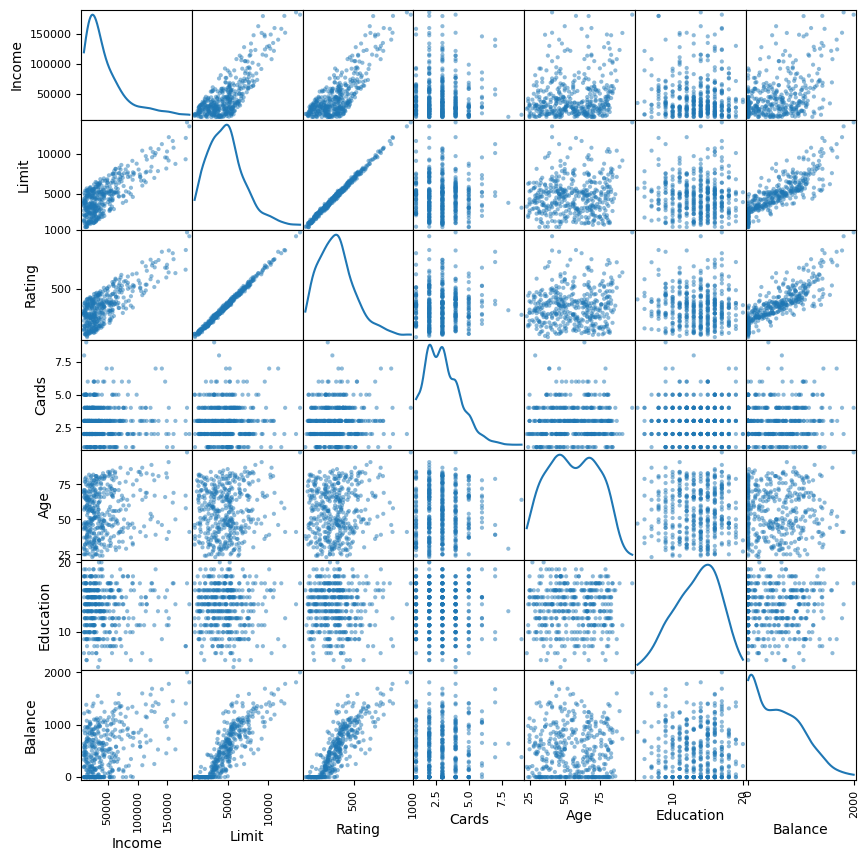

In [90]:
df=credit.drop(['Gender','Student', 'Married', 'Ethnicity'], axis=1)
print(df.corr())
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.show()

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


In [91]:
model = sm.ols(formula="Limit ~ Rating", data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:16:39   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ:**

Интерпретация данной модели.

**Значение R-квадрат**: 0.994.
99,4% изменчивости данных учитывается моделью.
Значение p очень мало.
Переменные имеют очень сильную корреляционную связь.

Уравнение регрессии: **Limit = -542.9 + 14.9*Rating**.

Это означает, что увеличение Рейтинга на одну единицу связано с увеличением Лимита на 14.9 единицы.

Обратимся к гипотезам
$$
H_0:\text{Между $x$ и $y$ не существует линейной зависимости} \iff \beta_1 = 0
$$ (Кредитный рейтинг не влияет на формирование лимита выдаваемого кредита)

$$
H_a: \text{Между $x$ и $y$ существует линейная зависимость} \iff \beta_1 \neq 0
$$ (Кредитный рейтинг напрямую влияет на величину лимита выдаваемого кредита)

Исходя из показателей модели, правдивой является альтернативная гипотеза, так как рейтинг напрямую влияет на лимит кредита.

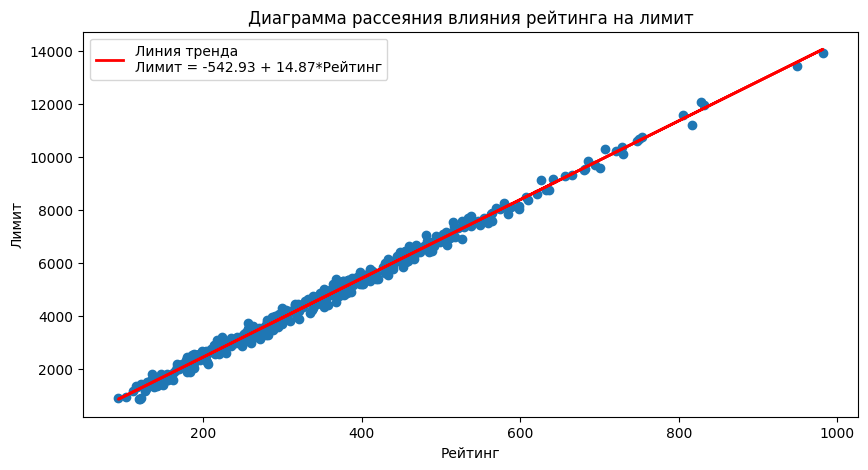

In [104]:
# Диаграмма рассеяния
plt.figure(figsize=(10, 5))
plt.scatter(credit['Rating'], credit['Limit'])
plt.title('Диаграмма рассеяния влияния рейтинга на лимит')
plt.xlabel('Рейтинг')
plt.ylabel('Лимит')

# Линейная регрессия
predictions = model.predict()

# Получение коэффициентов и R-квадрат
beta0, beta1 = model.params
r_2 = model.rsquared

# Добавление линии тренда
plt.plot(credit['Rating'], predictions, color='red', linewidth=2, label=f'Линия тренда\nЛимит = {beta0:.2f} + {beta1:.2f}*Рейтинг')

plt.legend()
plt.show()

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования лимита. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



1) Построим модель, в которой будем учитывать все переменные с численными значениями

In [92]:
model_2 = sm.ols(formula="Limit ~ Income + Cards + Age + Education + Balance", data=credit).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1242.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.32e-238
Time:                        10:16:39   Log-Likelihood:                -3101.0
No. Observations:                 400   AIC:                             6214.
Df Residuals:                     394   BIC:                             6238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1752.3883    170.621     10.271      0.000    1416.947    2087.830
Income         0.0323      0.001     34.737      0.000       0.031       0.034
Cards        -61.7552     20.904     -2.954      0.003    -102.852     -20.658
Age            1.9710      1.683      1.171      0.242      -1.337       5.279
Education     -4.9297      9.107     -0.541      0.589     -22.834      12.974
Balance        3.1921      0.070     45.291      0.000       3.053       3.331
==============================================================================
Omnibus:                       78.568   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.063
Skew:                          -1.356   Prob(JB):                     1.15e-27
Kurtosis:                       3.306   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Данная модель учиитывает 94% изменчивости данных.

2) Далее посмотрим, с какой силой влияет каждый параметр исходной таблицы.

2.1) Модель по переменной Доход

In [93]:
model_Income = sm.ols(formula="Limit ~ Income", data=credit).fit()
model_Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.39e-87
Time:                        10:16:39   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.000    2164.123    2615.616
Income         0.0519      0.002     25.888      0.000       0.048       0.056
==============================================================================
Omnibus:                      141.700   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.008
Skew:                          -0.064   Prob(JB):                     2.74e-05
Kurtosis:                       1.885   Cond. No.                     9.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2.2) Модель по переменной Карты

In [94]:
model_Cards = sm.ols(formula="Limit ~ Cards", data=credit).fit()
model_Cards.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.838
Time:                        10:16:39   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4684.6662    274.978     17.037      0.000    4144.076    5225.257
Cards         17.2219     84.369      0.204      0.838    -148.643     183.087
==============================================================================
Omnibus:                       46.466   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.069
Skew:                           0.833   Prob(JB):                     3.33e-14
Kurtosis:                       3.973   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.3) Модель по переменной Баланс

In [95]:
model_Balance = sm.ols(formula="Limit ~ Balance", data=credit).fit()
model_Balance.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          2.53e-119
Time:                        10:16:39   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.000    2311.802    2660.111
Balance        4.3261      0.128     33.879      0.000       4.075       4.577
==============================================================================
Omnibus:                       21.227   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.462
Skew:                           0.424   Prob(JB):                     4.00e-07
Kurtosis:                       4.024   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2.4) Модель по переменной Образование

In [96]:
model_Education = sm.ols(formula="Limit ~ Education", data=credit).fit()
model_Education.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2208
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.639
Time:                        10:16:40   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4969.5271    511.029      9.725      0.000    3964.874    5974.180
Education    -17.3924     37.011     -0.470      0.639     -90.154      55.369
==============================================================================
Omnibus:                       47.086   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.382
Skew:                           0.837   Prob(JB):                     1.72e-14
Kurtosis:                       3.999   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.5) Модель по переменной Возраст

In [97]:
model_Age = sm.ols(formula="Limit ~ Age", data=credit).fit()
model_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.093
Date:                Mon, 22 Apr 2024   Prob (F-statistic):             0.0437
Time:                        10:16:40   Log-Likelihood:                -3662.7
No. Observations:                 400   AIC:                             7329.
Df Residuals:                     398   BIC:                             7337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3984.0985    388.857     10.246      0.000    3219.629    4748.568
Age           13.4998      6.673      2.023      0.044       0.381      26.619
==============================================================================
Omnibus:                       41.937   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.407
Skew:                           0.782   Prob(JB):                     1.53e-12
Kurtosis:                       3.906   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.6) Модель на основе Дохода и Баланса

In [98]:
model_3 = sm.ols(formula="Limit ~ Income + Balance", data=credit).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.37e-241
Time:                        10:16:40   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Income         0.0327      0.001     35.691      0.000       0.031       0.035
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

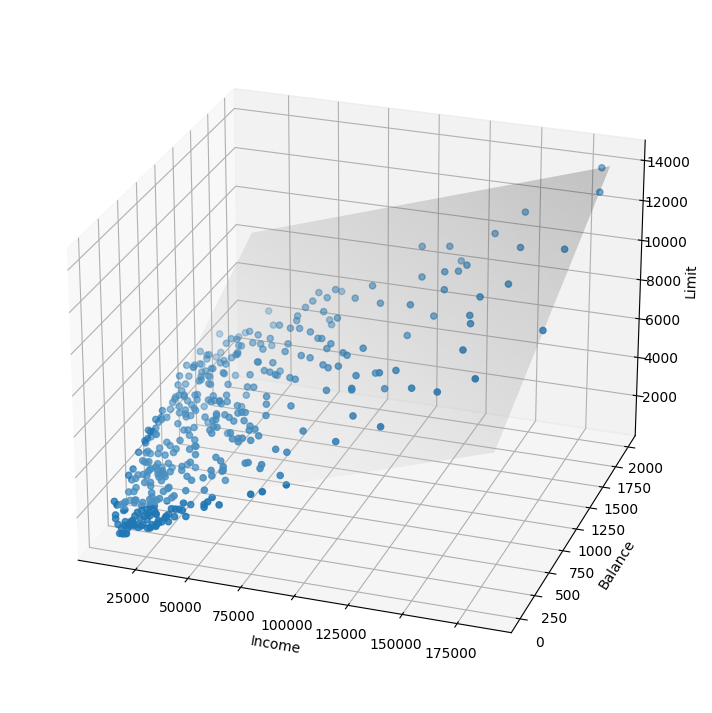

In [99]:
plt.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=credit['Income'], ys=credit['Balance'], zs=credit['Limit'])

x = np.linspace(credit['Income'].min(), credit['Income'].max(), 100)
y = np.linspace(credit['Balance'].min(), credit['Balance'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(model_3.params)
Z = par["Intercept"] + par["Income"]*X + par["Balance"]*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('Доход')
ax.set_ylabel('Баланс')
ax.set_zlabel('Лимит')

plt.show()

3) Построим модель на основе Баланса и Прибыли с учетом эффекта взаимодействия

In [100]:
model_4 = sm.ols(formula="Limit ~ Income + Balance + Income*Balance", data=credit).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2071.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.39e-241
Time:                        10:16:40   Log-Likelihood:                -3101.8
No. Observations:                 400   AIC:                             6212.
Df Residuals:                     396   BIC:                             6228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1455.5300     72.849     19.980      0.000    1312.310    1598.750
Income             0.0367      0.002     22.415      0.000       0.033       0.040
Balance            3.3824      0.103     32.717      0.000       3.179       3.586
Income:Balance -4.423e-06   1.53e-06     -2.885      0.004   -7.44e-06   -1.41e-06
==============================================================================
Omnibus:                       74.283   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.477
Skew:                          -1.290   Prob(JB):                     2.28e-25
Kurtosis:                       3.390   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Данная модель увеличила значение R-квадрат на 0.001, что не является значимым. Аналогичный процент показало сочетание всех численных переменных. Также подтверждает это значение коэффициента сочетания прибыли и баланса, он не является корректным для анализа (-4.423e-06)

**Вывод**

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:**

Интерпретация результатов множественной линейной регрессии:

Если указывать все параметры, модель учитывает 94% изменчивости данных. Это говорит о сильной корреляционной связи. Но не все параметры влияют на модель одинаково сильно. Построение моделей по каждому параметру позволило выявить **хорошие переменные: Доход и Баланс**. Параметры Карты, Возраст, Образование показали практически отсутствие зависимости от них.

Таким образом, лучшей получилась модель на основе Дохода и Баланса.
Во внимание также был принят эффект взаимодействия, но он не дал большого сдвига, поэтому для лучшей модели были взяты только два этих параметра.

Интерпретация данной модели.

**Значение R-квадрат**: 0.939.
93,9% изменчивости данных учитывается моделью.
Значение p для F-статистики очень мало.
Все значения p для переменных также очень малы.
Переменные имеют очень сильную корреляционную связь.

Уравнение регрессии:
$$
\text{Лимит} = 1610.37 + 3.16 * \text{Баланс} + 0.03*\text{Прибыль}.
$$



## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [101]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})
dummy = pd.get_dummies(credit['Ethnicity'])
credit_2 = pd.concat([credit,dummy],axis=1)
credit_2.rename(columns={'African American': 'African_American'}, inplace=True)
credit_2

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,African_American,Asian,Caucasian
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,False,False,True
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,False,True,False
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,False,True,False
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,False,True,False
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,False,False,True
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0,True,False,False
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1,False,False,True
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,False,False,True


Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [114]:
df2=credit_2.drop(['Gender','Student', 'Married', 'Ethnicity', 'Income', 'Rating', 'Cards', 'Age', 'Education', 'Balance'], axis=1)
print(df2.corr())
# pd.plotting.scatter_matrix(df2, figsize=(10, 10), diagonal='kde')
# plt.show()

                     Limit  Gender_num  Student_num  Married_num  \
Limit             1.000000    0.009397    -0.006015     0.031155   
Gender_num        0.009397    1.000000     0.055034     0.012452   
Student_num      -0.006015    0.055034     1.000000    -0.076974   
Married_num       0.031155    0.012452    -0.076974     1.000000   
African_American  0.036320   -0.014288     0.001931    -0.102707   
Asian            -0.032427    0.025425     0.053534     0.088595   
Caucasian        -0.003081   -0.009831    -0.048334     0.011418   

                  African_American     Asian  Caucasian  
Limit                     0.036320 -0.032427  -0.003081  
Gender_num               -0.014288  0.025425  -0.009831  
Student_num               0.001931  0.053534  -0.048334  
Married_num              -0.102707  0.088595   0.011418  
African_American          1.000000 -0.335526  -0.570641  
Asian                    -0.335526  1.000000  -0.582131  
Caucasian                -0.570641 -0.582131   1.

Исходя из значений корреляционной матрицы, предварительно можно сказать, что ни одна из категориальных переменных не влияет на Лимит

Сформулируем гипотезы перед построением модели:

$H_0$: Категориальные переменные влияют на корреляционную связь.

$H_A$: Категориальные переменные не влияют на корреляционную связь.

In [115]:
model_4 = sm.ols(formula="Limit ~ Gender_num + Student_num + Married_num + African_American +	Asian +	Caucasian", data=credit_2).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2538
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.938
Time:                        11:01:43   Log-Likelihood:                -3664.1
No. Observations:                 400   AIC:                             7340.
Df Residuals:                     394   BIC:                             7364.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3459.0864    171.930     20.119      0.000    3121.072    3797.101
African_American[T.True]  1310.4583    191.298      6.850      0.000     934.365    1686.551
Asian[T.True]             1007.9123    198.481      5.078      0.000     617.698    1398.127
Caucasian[T.True]         1140.7158    155.539      7.334      0.000     834.925    1446.507
Gender_num                  46.9381    232.490      0.202      0.840    -410.138     504.014
Student_num                -19.1817    389.008     -0.049      0.961    -783.973     745.610
Married_num                171.8843    240.485      0.715      0.475    -300.910     644.679
==============================================================================
Omnibus:                       45.162   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.383
Skew:                           0.825   Prob(JB):                     1.27e-13
Kurtosis:                       3.917   Cond. No.                     8.37e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Значение R^2 = 	0.003. Это говорит об отстутствии корреляционной связи модели.

По параметрам Gender_num + Student_num + Married_num - p-значение больше чем 0.05. Это говорит о том, что данные переменные точно не стоит включать в модель.
Попробуем построить модель, основываясь на расах.

In [110]:
model_5 = sm.ols(formula="Limit ~ Asian + African_American + Caucasian", data=credit_2).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3541
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.702
Time:                        10:56:34   Log-Likelihood:                -3664.4
No. Observations:                 400   AIC:                             7335.
Df Residuals:                     397   BIC:                             7347.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3554.4705     91.260     38.949      0.000    3375.058    3733.883
Asian[T.True]             1053.3531    185.822      5.669      0.000     688.035    1418.671
African_American[T.True]  1327.1255    187.946      7.061      0.000     957.632    1696.619
Caucasian[T.True]         1173.9919    147.507      7.959      0.000     884.000    1463.984
==============================================================================
Omnibus:                       45.815   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.723
Skew:                           0.829   Prob(JB):                     6.52e-14
Kurtosis:                       3.946   Cond. No.                     7.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Ваш ответ:**

После выполнения необходимых преобразований для подготовки категориальных переменных были построены соответствующие модели.

Интерпретация модели, построенной на всех категориальных переменных.

**Значение R-квадрат**: 0.003. Это говорит о том, что модель нельзя считать значимой.

Исходя из показателей модели, правдивой является альтернативная гипотеза, так как при построении модели по некатегориальным данным корреляционной связи нет.

Модели также были отдельно построены как на категориальных переменных со значениями (1; 0), так и со значениями рас. Однако они показали еще меньшие значения.